In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

      0    1
0    25  332
1    35  310
2    49  325
3    59  319
4    85  308
5    99  334
6   112  387
7   117  385
8   134  392
9   148  413
10  159  400
11  159  427
12  162  425
13  173  498
14  191  498
15  198  522
16  204  519
17  216  539
18  235  591
19  272  659


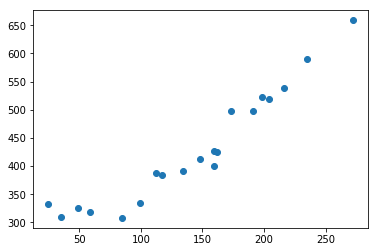

In [2]:
# 資料載入
train = np.loadtxt('data/920data.csv',delimiter=',',dtype='int')
df = pd.DataFrame(train)
print(df)
train_x = train[:,0]
train_y = train[:,1]

plt.scatter(train_x,train_y)
plt.show()

[-1.74067856 -1.59139223 -1.38239138 -1.23310505 -0.8449606  -0.63595975
 -0.44188752 -0.36724436 -0.11345761  0.09554325  0.25975821  0.25975821
  0.3045441   0.46875906  0.73747445  0.84197488  0.93154667  1.11069026
  1.39433428  1.94669369]


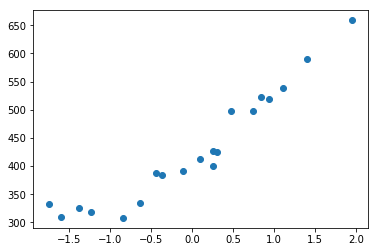

In [3]:
#標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x-mu)/sigma

train_z = standardize(train_x)
print(train_z)

plt.scatter(train_z,train_y)
plt.show()

In [4]:
theta0 = np.random.rand()
theta1 = np.random.rand()

def f(x):
    return theta0 + theta1 * x

def E(x,y):
    return 0.5 * np.sum((y - f(x)) ** 2)

ETA = 1e-3
diff = 1
count = 0

In [5]:
error = E(train_z,train_y)
while diff > 1e-2:
    
    top_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    top_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    theta0 = top_theta0
    theta1 = top_theta1
    
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    count += 1
    log = '迭代第{}次: theta0 = {:.3f}, theta1 = {:.3f}, 總分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))
    
print('迭代次数: %d' % count)

迭代第1次: theta0 = 8.904, theta1 = 1.919, 總分 = 76276.4077
迭代第2次: theta0 = 17.309, theta1 = 3.751, 總分 = 73255.8620
迭代第3次: theta0 = 25.546, theta1 = 5.545, 總分 = 70354.9299
迭代第4次: theta0 = 33.618, theta1 = 7.304, 總分 = 67568.8746
迭代第5次: theta0 = 41.529, theta1 = 9.027, 總分 = 64893.1472
迭代第6次: theta0 = 49.281, theta1 = 10.716, 總分 = 62323.3786
迭代第7次: theta0 = 56.879, theta1 = 12.372, 總分 = 59855.3728
迭代第8次: theta0 = 64.324, theta1 = 13.994, 總分 = 57485.1000
迭代第9次: theta0 = 71.621, theta1 = 15.583, 總分 = 55208.6901
迭代第10次: theta0 = 78.771, theta1 = 17.141, 總分 = 53022.4259
迭代第11次: theta0 = 85.779, theta1 = 18.668, 總分 = 50922.7379
迭代第12次: theta0 = 92.646, theta1 = 20.164, 總分 = 48906.1974
迭代第13次: theta0 = 99.376, theta1 = 21.631, 總分 = 46969.5120
迭代第14次: theta0 = 105.972, theta1 = 23.068, 總分 = 45109.5193
迭代第15次: theta0 = 112.435, theta1 = 24.476, 總分 = 43323.1824
迭代第16次: theta0 = 118.770, theta1 = 25.856, 總分 = 41607.5844
迭代第17次: theta0 = 124.977, theta1 = 27.208, 總分 = 39959.9240
迭代第18次: theta0 = 131.061,

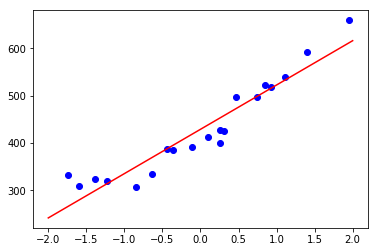

In [6]:
X = range(-2,3)
Y = [(theta1*i+theta0) for i in X]

plt.scatter(train_z,train_y,color='blue')
plt.plot(X,Y,color='red')
plt.show()